# CNN for CIFAR10 with Tensorflow 2

### Import TensorFlow

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# from tensorflow.keras import datasets, layers, models

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.4.1


### Download and prepare the CIFAR-10 dataset

In [2]:
# Import and load the CIFAR-10 data directly from tf.keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

### Explore the data

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
len(train_labels)

50000

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
len(test_labels)

10000

### Preprocess the data

In [9]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Build the model

#### Set up parameters

In [10]:
param_epoch_count = 20
param_batch_size = 32
param_act_fn = 'relu'
param_optimizer = 'adam'
param_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#### Set up architecture

In [11]:
model = tf.keras.Sequential()

#### Create the convolutional base
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=param_act_fn, input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=param_act_fn))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=param_act_fn))

#### Add Dense layers on top
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation=param_act_fn))
model.add(tf.keras.layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

#### Compile the model

In [13]:
model.compile(optimizer=param_optimizer,
              loss=param_loss_fn,
              metrics=['accuracy'])

### Train the model

In [14]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=param_epoch_count, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 10s 5ms/step - loss: 1.7880 - accuracy: 0.3366 - val_loss: 1.2610 - val_accuracy: 0.5515
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2029 - accuracy: 0.5720 - val_loss: 1.1205 - val_accuracy: 0.6004
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0284 - accuracy: 0.6396 - val_loss: 1.1308 - val_accuracy: 0.5980
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9347 - accuracy: 0.6714 - val_loss: 0.9813 - val_accuracy: 0.6534
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8393 - accuracy: 0.7060 - val_loss: 0.9205 - val_accuracy: 0.6776
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7863 - accuracy: 0.7228 - val_loss: 0.8681 - val_accuracy: 0.6915
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7434 - accuracy: 0.7378 - val_loss: 0.8796 - val_accuracy

### Evaluate the model

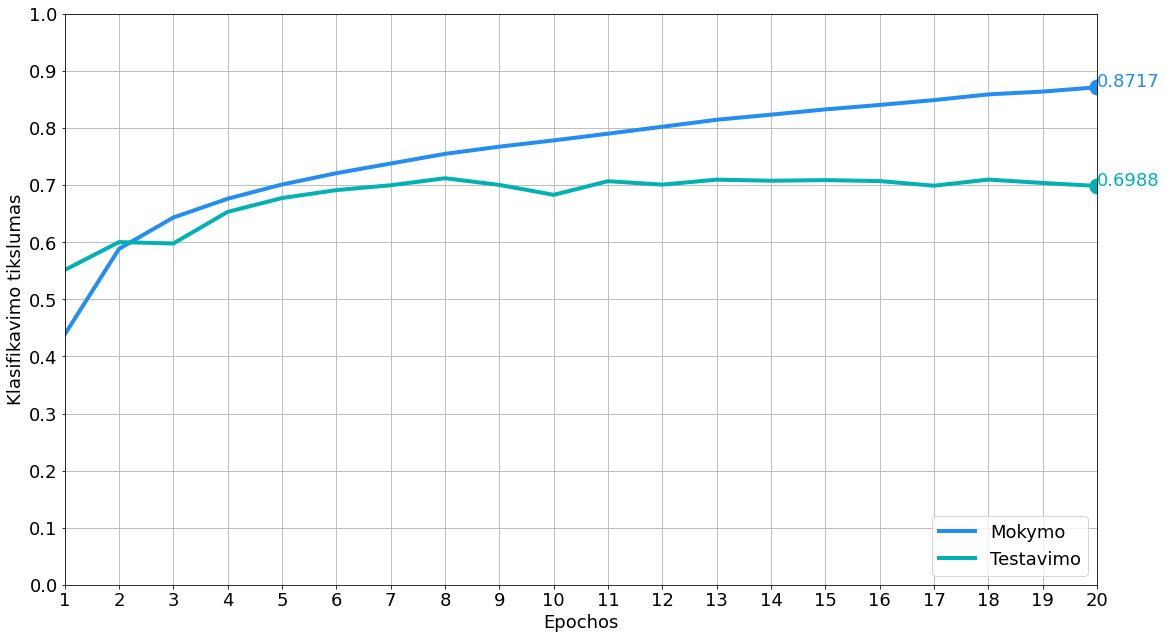

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.xaxis.set_ticks(np.arange(0, param_epoch_count+1))
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))
ax.grid()

train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

color_train='#238ef0'
color_test='#01b1b3'

plt.rcParams.update({'font.size': 18})

plt.plot(np.arange(1,param_epoch_count+1), train_acc, label='Mokymo', c=color_train, linewidth=4)
plt.plot(np.arange(1,param_epoch_count+1), test_acc, label='Testavimo', c=color_test, linewidth=4)

plt.plot(param_epoch_count, train_acc[-1],'co', c=color_train, markersize=15)
plt.text(param_epoch_count, train_acc[-1], "{:.4f}".format(train_acc[-1]), c=color_train)

plt.plot(param_epoch_count, test_acc[-1], 'co', c=color_test, markersize=15)
plt.text(param_epoch_count, test_acc[-1], "{:.4f}".format(test_acc[-1]), c=color_test)

plt.xlabel('Epochos', fontsize=18)
plt.ylabel('Klasifikavimo tikslumas', fontsize=18)

plt.xlim([1, param_epoch_count])
plt.ylim([0.0, 1.0])

plt.legend(loc='lower right')